# PROJECT:-ONE PLUS 8 REVIEW
## SITE:AMAZON


### About the project:
this project is about the review gathered from the amazon site using webscrapping,beautiful soup which is the html parser.
1.gathered the reviews,stars,and name using scrapping.
2.using the pandas library made a data frame.
3.did the sentimental analysis found the polarity and subjectivity.
4.added to the data frame.
5.did the data visualization and found out the conclusion.


## 1.IMPORTING ALL THE LIBRARIES

In [94]:
import requests
import bs4
import pandas as pd
from textblob import TextBlob
import numpy as np
import requests
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


## 2. GETTING THE IMAGE OF ONE PLUS 8

In [79]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

In [10]:
url="https://fdn2.gsmarena.com/vv/pics/oneplus/oneplus-8-1.jpg"
resp=requests.get(url)

In [11]:
resp.status_code

200

In [12]:
resp.headers['content-type']

'image/jpeg'

In [14]:
with open('oneplus8.jpeg','wb') as fp:
    fp.write(resp.content)
    fp.close()

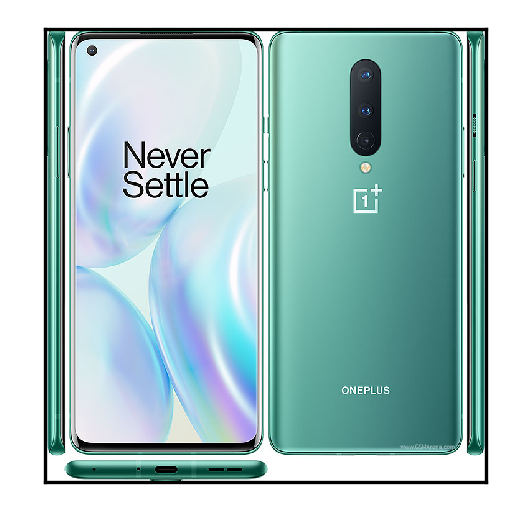

In [23]:

image=plt.imread('oneplus8.jpeg')
plt.figure(figsize=(2,2))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

## 3.SCRAPPING THROUGH THE AMAZON SITE

#### Here we are scrapping the reviews of each customer who has given the reviews on the amazon site and appending it into the list using the for loop.

### Polarity:-polarity of the given text data tells us the how positive the statement is .it varies from -1 to 1,
### LESS THAN '0' POLARITY DENOTES NEGATIVE STATEMENT.
### MORE THAN '0' POLARITY DENOTES POSITIVE STATEMENT.
### '0' DENOTES THE NEUTRAL STATEMENT

### SUBJECTIVITY:- the quality of being based on or influenced by personal feelings, tastes, or opinions.

so here using sentimental analysis we found out polarity and subjectivity of each review

In [26]:
names=[]
reviews_final=[]
stars=[]
polarity=[]
subjectivity=[]
var=1
while True:
    url=f"https://www.amazon.in/Test-Exclusive-547/product-reviews/B078BNQ318/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={var}"
    headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
    
    page=requests.get(url,headers=headers)
    if page.status_code==200:
        data=bs4.BeautifulSoup(page.text)
        name=data.find_all('span',{'class':'a-profile-name'})
        next_page=data.find_all('li',{'class':'a-last'})
        for n in name[2:]:
            a=n.text
            names.append(a)
        reviews=data.find_all('a',{'data-hook':'review-title'})
        for r in reviews:
            d=r.text.strip()
            reviews_final.append(d)
        star=data.find_all('i',{'data-hook':'review-star-rating'})
        for s in star:
            e=s.text.split()
            f=float(e[0])
            stars.append(f)
        print(f'loop ran for {var} time')
        if next_page:
            var=var+1
        else:
            print(f"no of review pages={var}")
            break
    else:
        print(f"error found at page no {var} with error code {page.status_code}")
        break
else:
    print("data fetching successful")
for i in reviews_final:
    s=TextBlob(i).sentiment.subjectivity
    p=TextBlob(i).sentiment.polarity
    subjectivity.append(s)
    polarity.append(p)
        
        

loop ran for 1 time
loop ran for 2 time
loop ran for 3 time
loop ran for 4 time
loop ran for 5 time
loop ran for 6 time
loop ran for 7 time
loop ran for 8 time
loop ran for 9 time
loop ran for 10 time
loop ran for 11 time
loop ran for 12 time
loop ran for 13 time
loop ran for 14 time
loop ran for 15 time
loop ran for 16 time
loop ran for 17 time
loop ran for 18 time
loop ran for 19 time
loop ran for 20 time
loop ran for 21 time
loop ran for 22 time
loop ran for 23 time
loop ran for 24 time
loop ran for 25 time
loop ran for 26 time
loop ran for 27 time
loop ran for 28 time
loop ran for 29 time
loop ran for 30 time
loop ran for 31 time
loop ran for 32 time
loop ran for 33 time
loop ran for 34 time
loop ran for 35 time
loop ran for 36 time
loop ran for 37 time
loop ran for 38 time
loop ran for 39 time
loop ran for 40 time
loop ran for 41 time
loop ran for 42 time
loop ran for 43 time
loop ran for 44 time
loop ran for 45 time
loop ran for 46 time
loop ran for 47 time
loop ran for 48 time
l

##### now checing if the no of names,reviews,stars,polarity and subjectivity are all same or not?

In [27]:
print(len(names))
print(len(reviews_final))
print(len(stars))
print(len(polarity))
print(len(subjectivity))


777
777
777
777
777


#### we concluded that all are same

### 5. NOW MAKING THE DATA FRAME 

In [28]:
df=pd.DataFrame({
    'name':names,
    'reviews':reviews_final,
    'stars':stars,
    'polarity':polarity,
    'subjectivity':subjectivity
},
index=[v for v in range(1,len(polarity)+1)])

now before using the data lets know about the data:

In [29]:
df.describe()

,stars,polarity,subjectivity
count,777.000000,777.000000,777.000000
mean,4.217503,0.316065,0.431436
std,1.307316,0.462383,0.387465
min,1.000000,-1.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,5.000000,0.250000,0.400000
75%,5.000000,0.700000,0.780000
max,5.000000,1.000000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 1 to 777
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          777 non-null    object 
 1   reviews       777 non-null    object 
 2   stars         777 non-null    float64
 3   polarity      777 non-null    float64
 4   subjectivity  777 non-null    float64
dtypes: float64(3), object(2)
memory usage: 36.4+ KB


### from the above info we got to know how many colums are not null.and from the given info we got to know that no row of any column is empty

In [33]:
df.head()

,name,reviews,stars,polarity,subjectivity
1,Manpreet Singh,Great but always with some screen and body iss...,3.0,1.00,0.75
2,ashish,Please read before buying,1.0,0.00,0.00
3,Vivek Kr. Meena,Delivers what they promised.! ;),5.0,0.25,1.00
4,Rahul,Amazing Experience with Oneplus 8,5.0,0.60,0.90
5,shaikh,Poor Camera Quality.....Too Expensive,1.0,-0.45,0.65


In [34]:
df.tail()

,name,reviews,stars,polarity,subjectivity
773,B.Adithya,Amazing Product,5.0,0.6,0.900000
774,D.SESHANK,Bring it blindly,5.0,-0.5,0.666667
775,Kunal chandravanshi,Charging sucks.,4.0,-0.3,0.300000
776,Anuj Pant,Worth the money,5.0,0.3,0.100000
777,Rajeev Pandey,Value for money,5.0,0.0,0.000000


## 6.now a function score is made in which it returns the negative when polarity less than 0 ,neutral whrn polarity=0
## and positive when more than 0

In [36]:
def getComment(score):
    if score<0:
        return "NEGATIVE"
    elif score==0:
        return "NEUTRAL"
    else:
        return "POSITIVE"

In [37]:
df['Comment']=df['polarity'].apply(getComment)

In [38]:
df.head()

,name,reviews,stars,polarity,subjectivity,Comment
1,Manpreet Singh,Great but always with some screen and body iss...,3.0,1.00,0.75,POSITIVE
2,ashish,Please read before buying,1.0,0.00,0.00,NEUTRAL
3,Vivek Kr. Meena,Delivers what they promised.! ;),5.0,0.25,1.00,POSITIVE
4,Rahul,Amazing Experience with Oneplus 8,5.0,0.60,0.90,POSITIVE
5,shaikh,Poor Camera Quality.....Too Expensive,1.0,-0.45,0.65,NEGATIVE


create a function to add a column in dataframe that is satisaction in which when star<3 then "not satisfied".
when star=3 then "partially satisfied" and when star>3 then "Full satisfaction".

In [40]:
def starstype(star):
    if star<3:
        return "Not satisfied"
    elif star==3:
        return "partially satisfied"
    else:
        return "Full Satisfaction"

In [41]:
df['satisfaction']=df['stars'].apply(starstype)

In [42]:
df.head()

,name,reviews,stars,polarity,subjectivity,Comment,satisfaction
1,Manpreet Singh,Great but always with some screen and body iss...,3.0,1.00,0.75,POSITIVE,partially satisfied
2,ashish,Please read before buying,1.0,0.00,0.00,NEUTRAL,Not satisfied
3,Vivek Kr. Meena,Delivers what they promised.! ;),5.0,0.25,1.00,POSITIVE,Full Satisfaction
4,Rahul,Amazing Experience with Oneplus 8,5.0,0.60,0.90,POSITIVE,Full Satisfaction
5,shaikh,Poor Camera Quality.....Too Expensive,1.0,-0.45,0.65,NEGATIVE,Not satisfied


In [43]:
#printall positive statements in descending order like most positive in the begining and least at the end
positive_statements=[]
SortedDf=df.sort_values(by=['polarity'],ascending=False)
for i in SortedDf.index:
    if SortedDf['Comment'][i]=='POSITIVE':
        print(str(i) + SortedDf['reviews'][i] )
        positive_statements.append(SortedDf['reviews'][i])

1Great but always with some screen and body issues!
630Best phone till now
661It is awesome product
224Really awesome phone....
225Best in the market
648The Best device to recommend..🔥🔥
242Awesome Phone Go For It..
244The best phone but having issues with wifi
247One of the best after a weeks use of the phone
640Awesome
638Best
631Awesome
268One plus is best in its price range
628Device is best
309AWESOME
626Awesome
284Awesome Phone
287One plus 8 winner of 2020 Best mobiles phone
621Just awesome
290Best Phone Ever
291Awesome buy
292Superb phone !
293Best Phone
297Faster delivery. Best mobile phone.
298EXCELLENT 👌
304Awesome product 👌
208One plus is the best at this price range.
663Excellent
670Best from oneplus
195Superb
121Best phone in the range of 40k
123Best Product
700Best buy
135Perfect Phone
138Impressive performance and flagship feel
697For 42k best option
696Best mobile
693best
152Best in All Android Phone
691Great device!
689Phone is excellent
159Prime service best
160Perfect

In [44]:
no_of_positive_statements=len(positive_statements)

In [45]:
#printall negative statements in descending order like most negative at the begining
negative_statements=[]
SortedDf=df.sort_values(by=['polarity'],ascending=True)
for i in SortedDf.index:
    if SortedDf['Comment'][i]=='NEGATIVE':
        print(str(i) + SortedDf['reviews'][i] )
        negative_statements.append(SortedDf['reviews'][i])

156Worst phone
19Awful Amoled Screen
657Worst product
529Worst phone
642Worst .....dnt buy
193Worst camera quality.
746Disappointed!
406Very bad quality I want replace or refund immediately
411Very bad experience ☹️
178Over all OnePlus 8 is very bad in battery life.
167Camera struggling 😔😭 night photography is very bad
110Badly Disappointed With OnePlus 8 Performance
186Disappointed
378Disappointed
46Disappointed with one plus. Please change my phone .
294Disappointed with the color
220Oneplus 8 camera quality is very poor and very bad
635Bad service
313Camera quality is bad
232Bad camera quality
38Not so gud not so bad
227Bad camera
665Bad product
420Bad quality
69bad software optimization
487Bad product
165Very bad handset device One Plus 8 mean disadvantage Camera
502Pathetic  missing connector
80Very very very very poor quality front camera.
72Very poor
194Camera quality is very poor.
774Bring it blindly
142Worst phone in entire world
5Poor Camera Quality.....Too Expensive
90Camera

In [46]:
no_of_negative_statements=len(negative_statements)

In [47]:
#printall neutral statements
neutral_statements=[]
SortedDf=df.sort_values(by=['polarity'],ascending=True)
for i in SortedDf.index:
    if SortedDf['Comment'][i]=='NEUTRAL':
        print(str(i) + SortedDf['reviews'][i] )
        neutral_statements.append(SortedDf['reviews'][i])

308Oneplus 8 6gb ram 128gb rom
441Network issue
438The beast
437Monster features
436Phone
310One plus 8
315Finally in OnePlus Club
435Wawooo
316OnePlus 8
434Phone is heating up
317Match the speed
431Heat up
427Kiduu
426oneplus 8
423want to return this phone
303Quality
447❤️
452Review
296One plus 😘🥰🥰
476Fingerprint
474Experience
472NA
470Just buy it......
272oneplus 8
274I will score this phone 10/10, but not for camera lovers
275The beast 🔥 🔥🔥💪💪💪
320Go for it!! Bang for the bulks!
465Terrafic
277Moneyworthie phone
278Don't buy if u r camera lover
281Over hyped
283Goooooood one
288Beast
457OnePlus 8 ❣️
289Amaizng
464Beast
368Beast in class
366One plus 8
323One plus 8 (6gb/128gb)
386Value for money
38410/10
383Frozen screen, instrument hangs
350Sohail khan
380Heating issue
379Oneplus 8 (6GB, 128GB)
352Never settle
354Giod
358If u r not a selfie lover this phone is for you
360Not anymore a flagship killer , its a flagship itself now
373Must buy
371Charging issue
361I likeit..
364🥳
370Vera

In [48]:
no_of_neutral_statements=len(neutral_statements)

In [49]:
print(f"total positive reviews={no_of_positive_statements}")
print(f"total negative reviews={no_of_negative_statements}")
print(f"total neutral reviews={no_of_neutral_statements}")

total positive reviews=420
total negative reviews=81
total neutral reviews=276


In [51]:
len(reviews_final)

777

In [52]:
420+81+276

777

## by the above comparision we were able to divide the polarity the three parts

In [59]:
a=df.shape[0]

Getting the percentage of the positive ,negative and neutral comments:

In [65]:
##percentage of neutral ,positive and negative statements
print(f"percentage_of_positive_statements={round((no_of_positive_statements/a)*100,1)}")
print(f"percentage_of_negative_statements={round((no_of_negative_statements/a)*100,1)}")
print(f"percentage_of_neutral_statements={round((no_of_neutral_statements/a)*100,1)}")

percentage_of_positive_statements=54.1
percentage_of_negative_statements=10.4
percentage_of_neutral_statements=35.5


## 7.VISUALIZATION

THE GRAPH BELOW  IS THE "SCATTER PLOT" .IT SHOWS THE RELATIONSHIP BETWEEN THE POLARITY AND THE SUBJECTIVITY
FOR THE POLARITY LESS THAN ZERO IT SHOWS THE INVERSE RELATION BETWEEN THE POLARITY AND THE SUBJECTIVITY AND 
FOR THE POLARITY GREATER THAN ZERO IT SHOWS THE POSITIVE RELATION BUT THE DATA IS VERY MUCH SCATTERED .SO CANNOT DRAW AN
APPROXIMATE CONCLUSION.

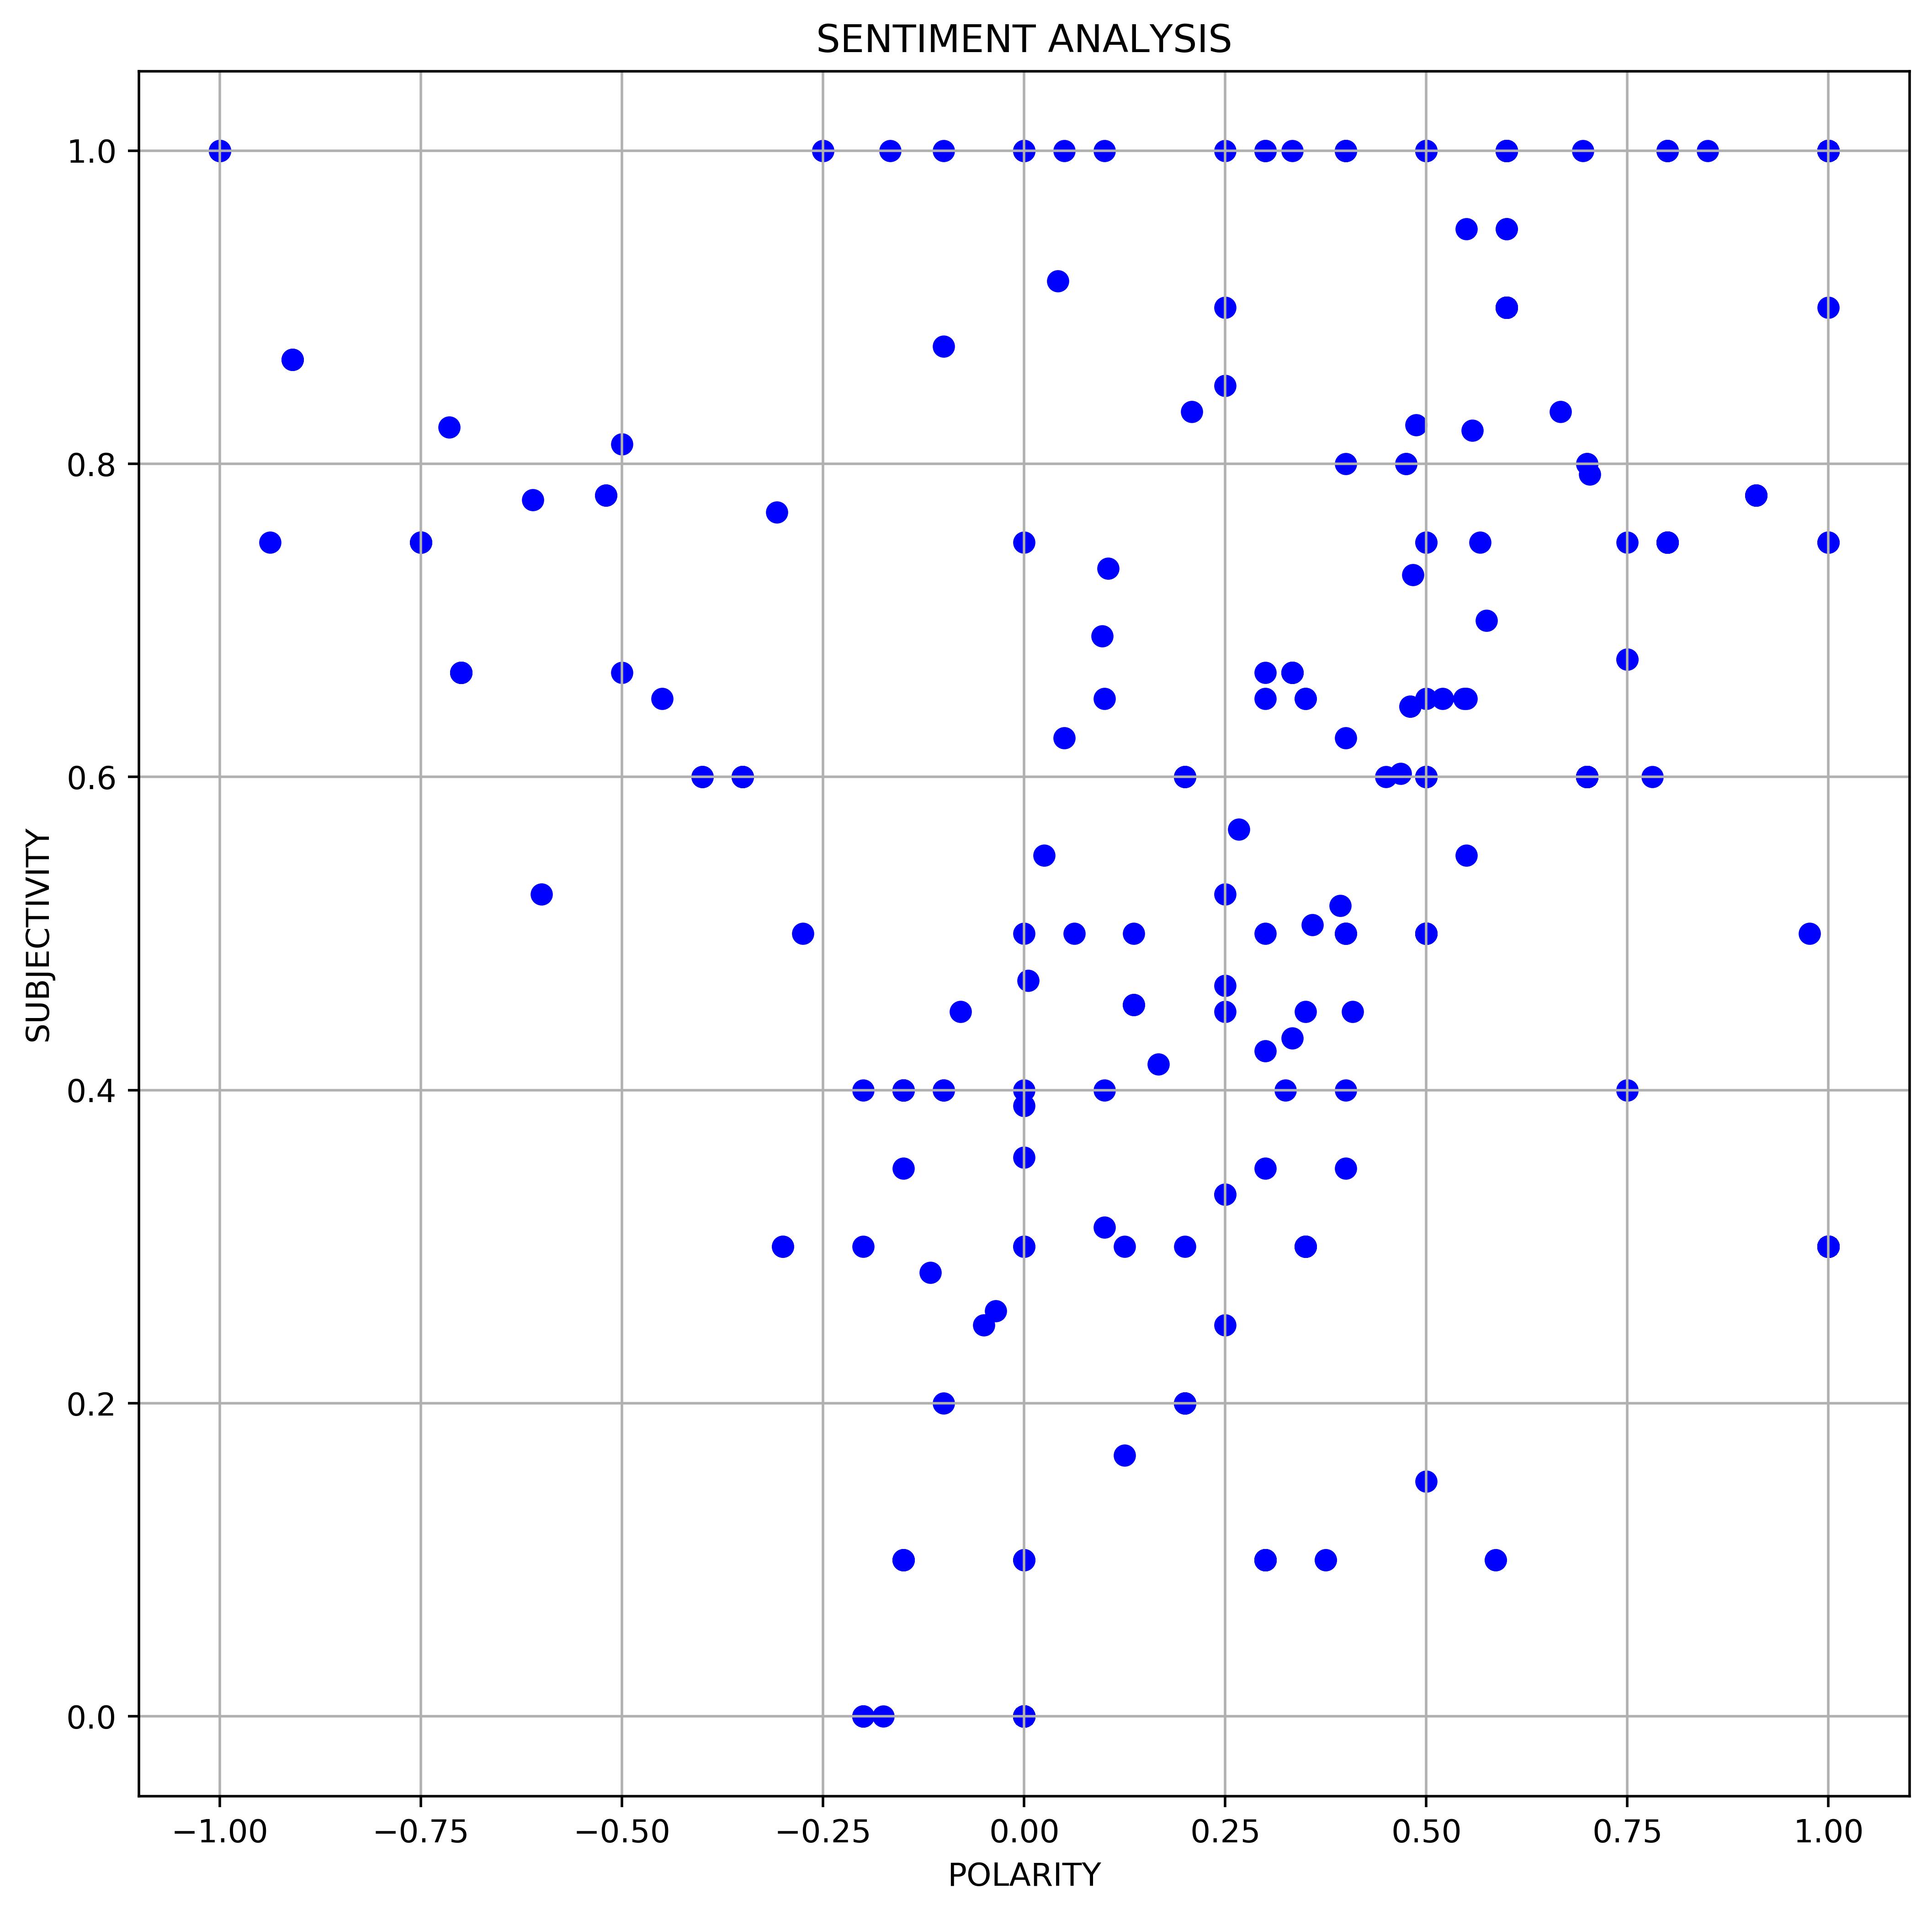

In [67]:
plt.figure(figsize=(10,10),dpi=500)
plt.scatter('polarity','subjectivity',data=df,color='blue')
plt.title("SENTIMENT ANALYSIS")
plt.xlabel("POLARITY")
plt.ylabel("SUBJECTIVITY")
plt.grid()
plt.show()

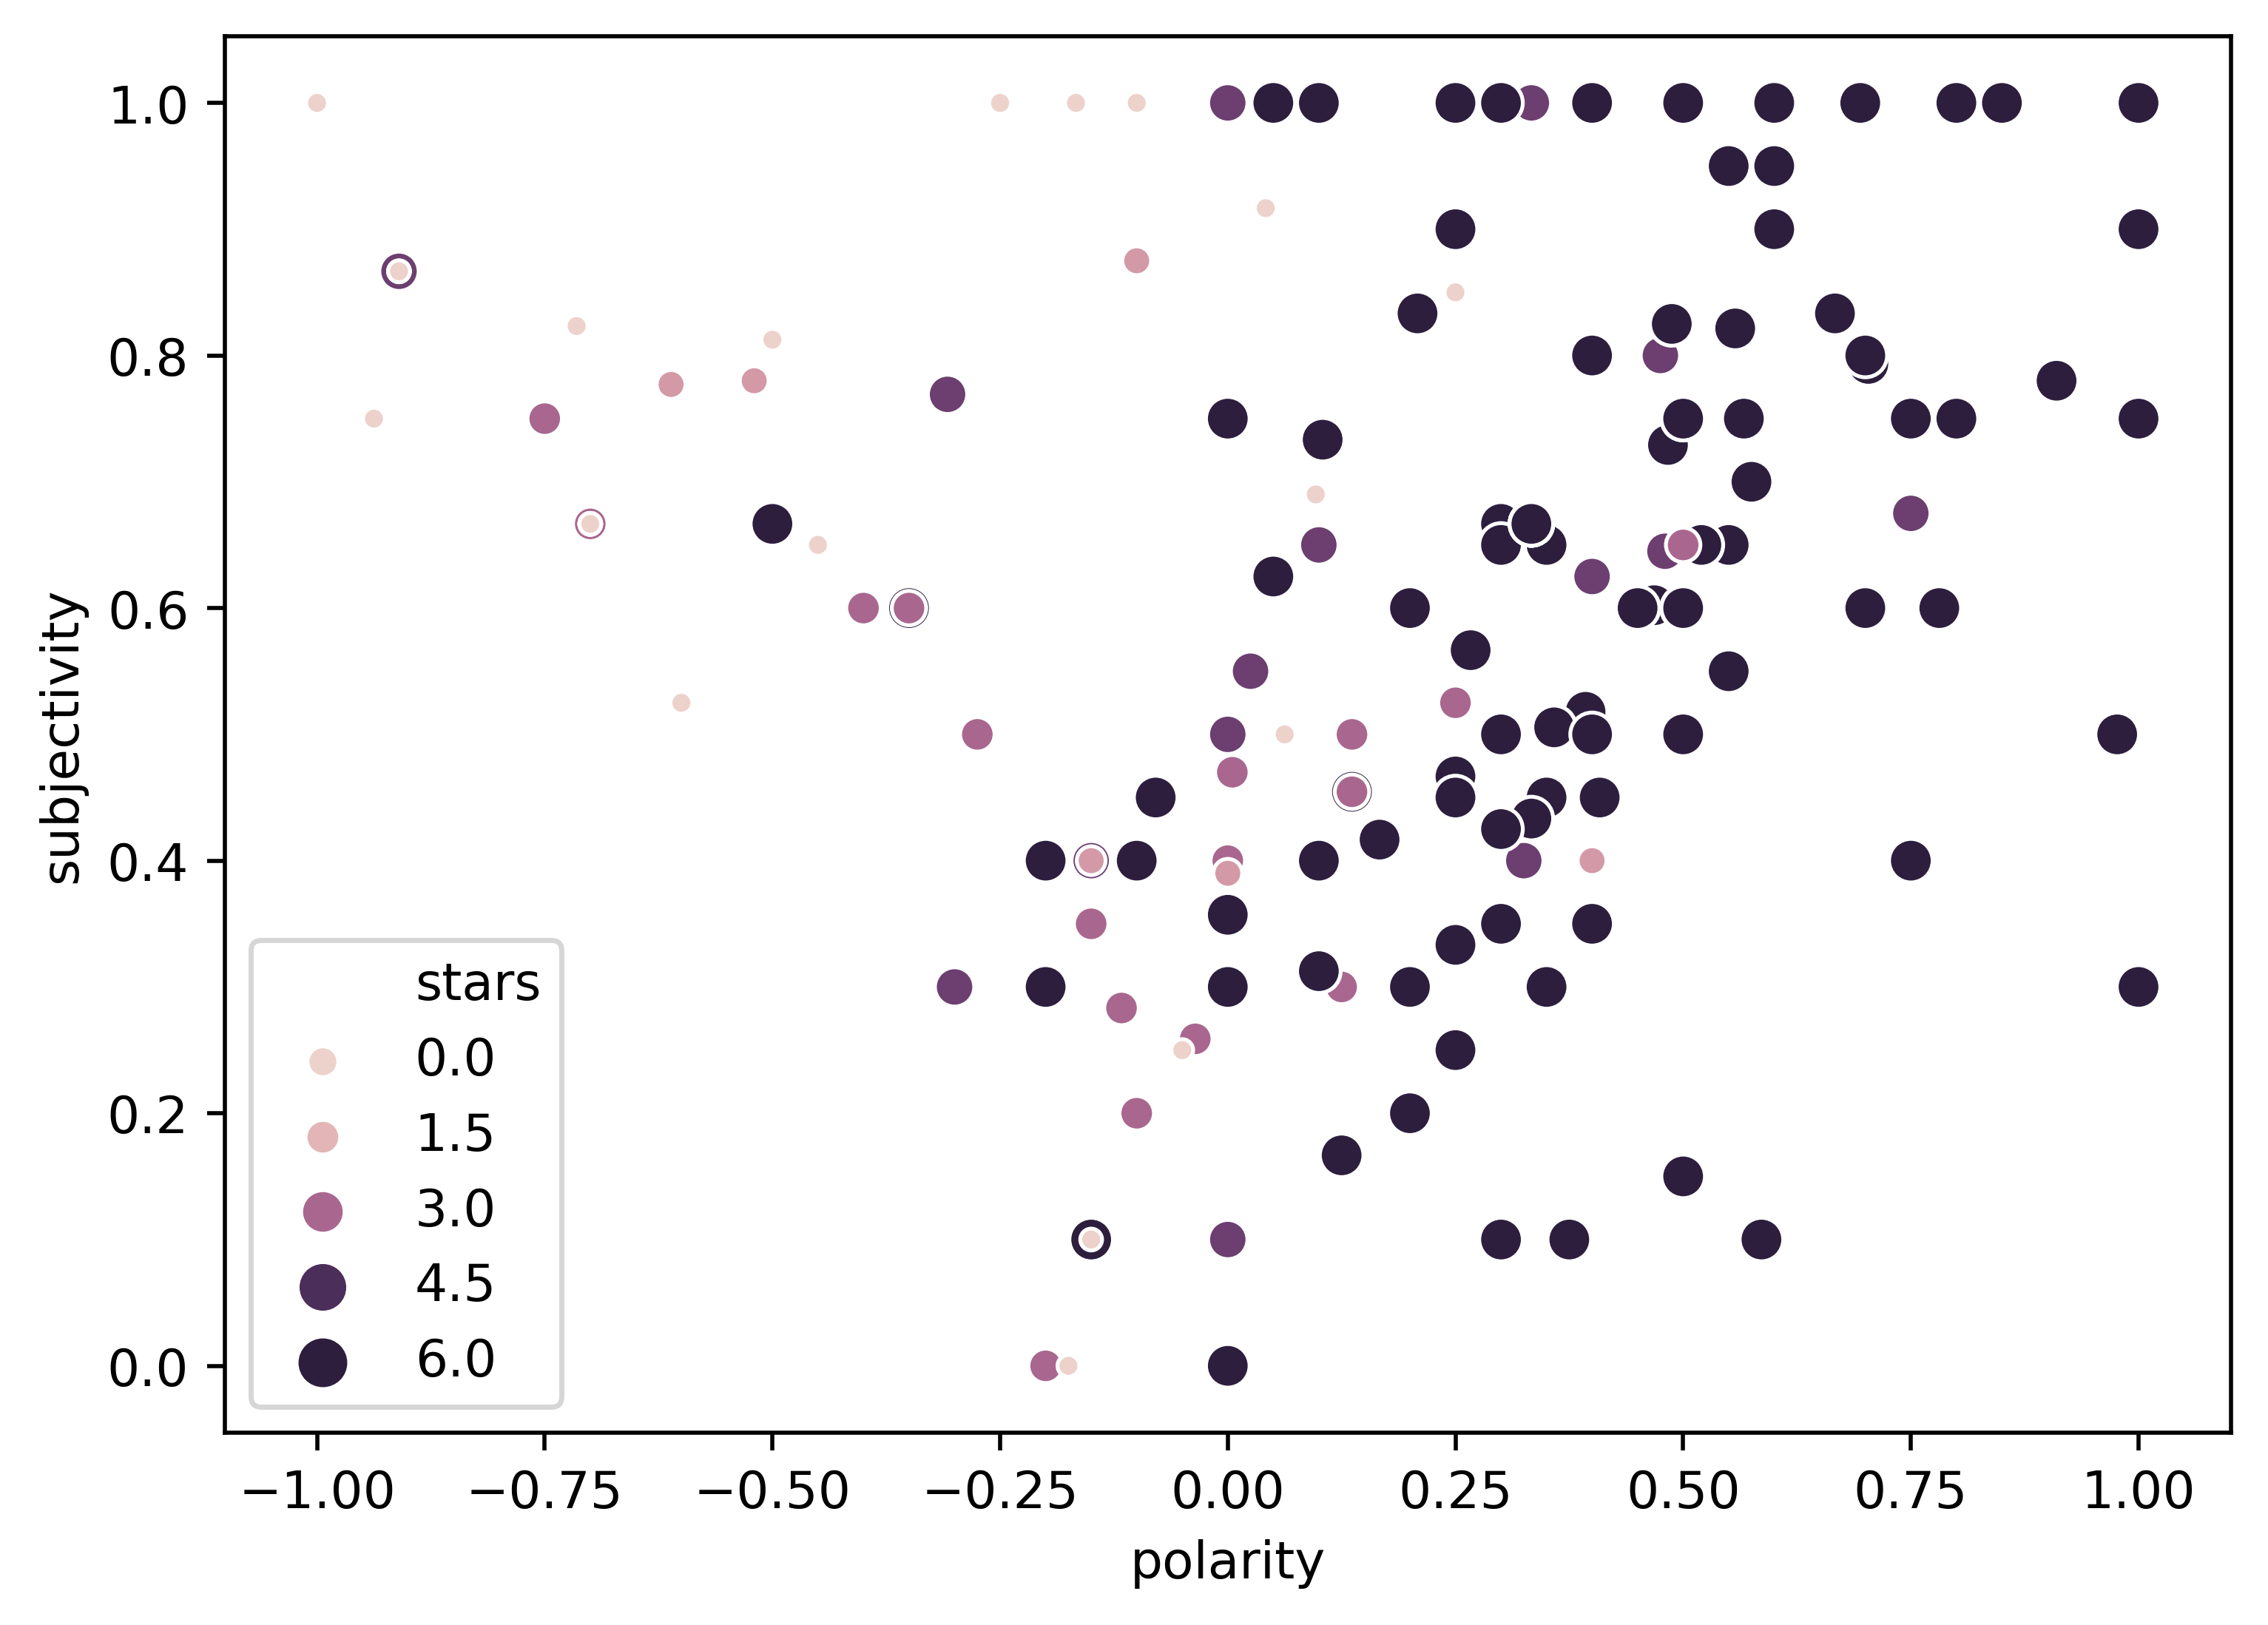

In [71]:
plt.figure(figsize=(7,5),dpi=500)
sns.scatterplot('polarity', 'subjectivity', size='stars',hue='stars' ,data=df)
plt.show()

In [72]:
def show_text(color, ax, fs=15,):
    m_h = 0
    heights = [ b.get_height() for b in ax.patches]
    max_height = max(heights)
    pad = max_height*0.3
    text_pad = max_height*0.1
    for c,box in zip(color, ax.patches):
        x = box.get_x()
        x += box.get_width()/2
        y = box.get_height()
        ax.text(x, y+text_pad, box.get_height(),
        color=c, fontsize=fs)
        box.set_color(c)
        ax.set_ylim([0, max_height+pad])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

THE GRAPH BELOW IS THE BAR PLOT WHICH IS BASICALLY GIVING A BETTER VISUALIZATION ABOUT THE TYPE OF COMMENTS MADE
BY CUSTOMERS .IT SHOWS THERE IS A VERY LESS PROPORTION OF CUSTOMER WHO HAVE MADE A NEGATIVE COMMENT.

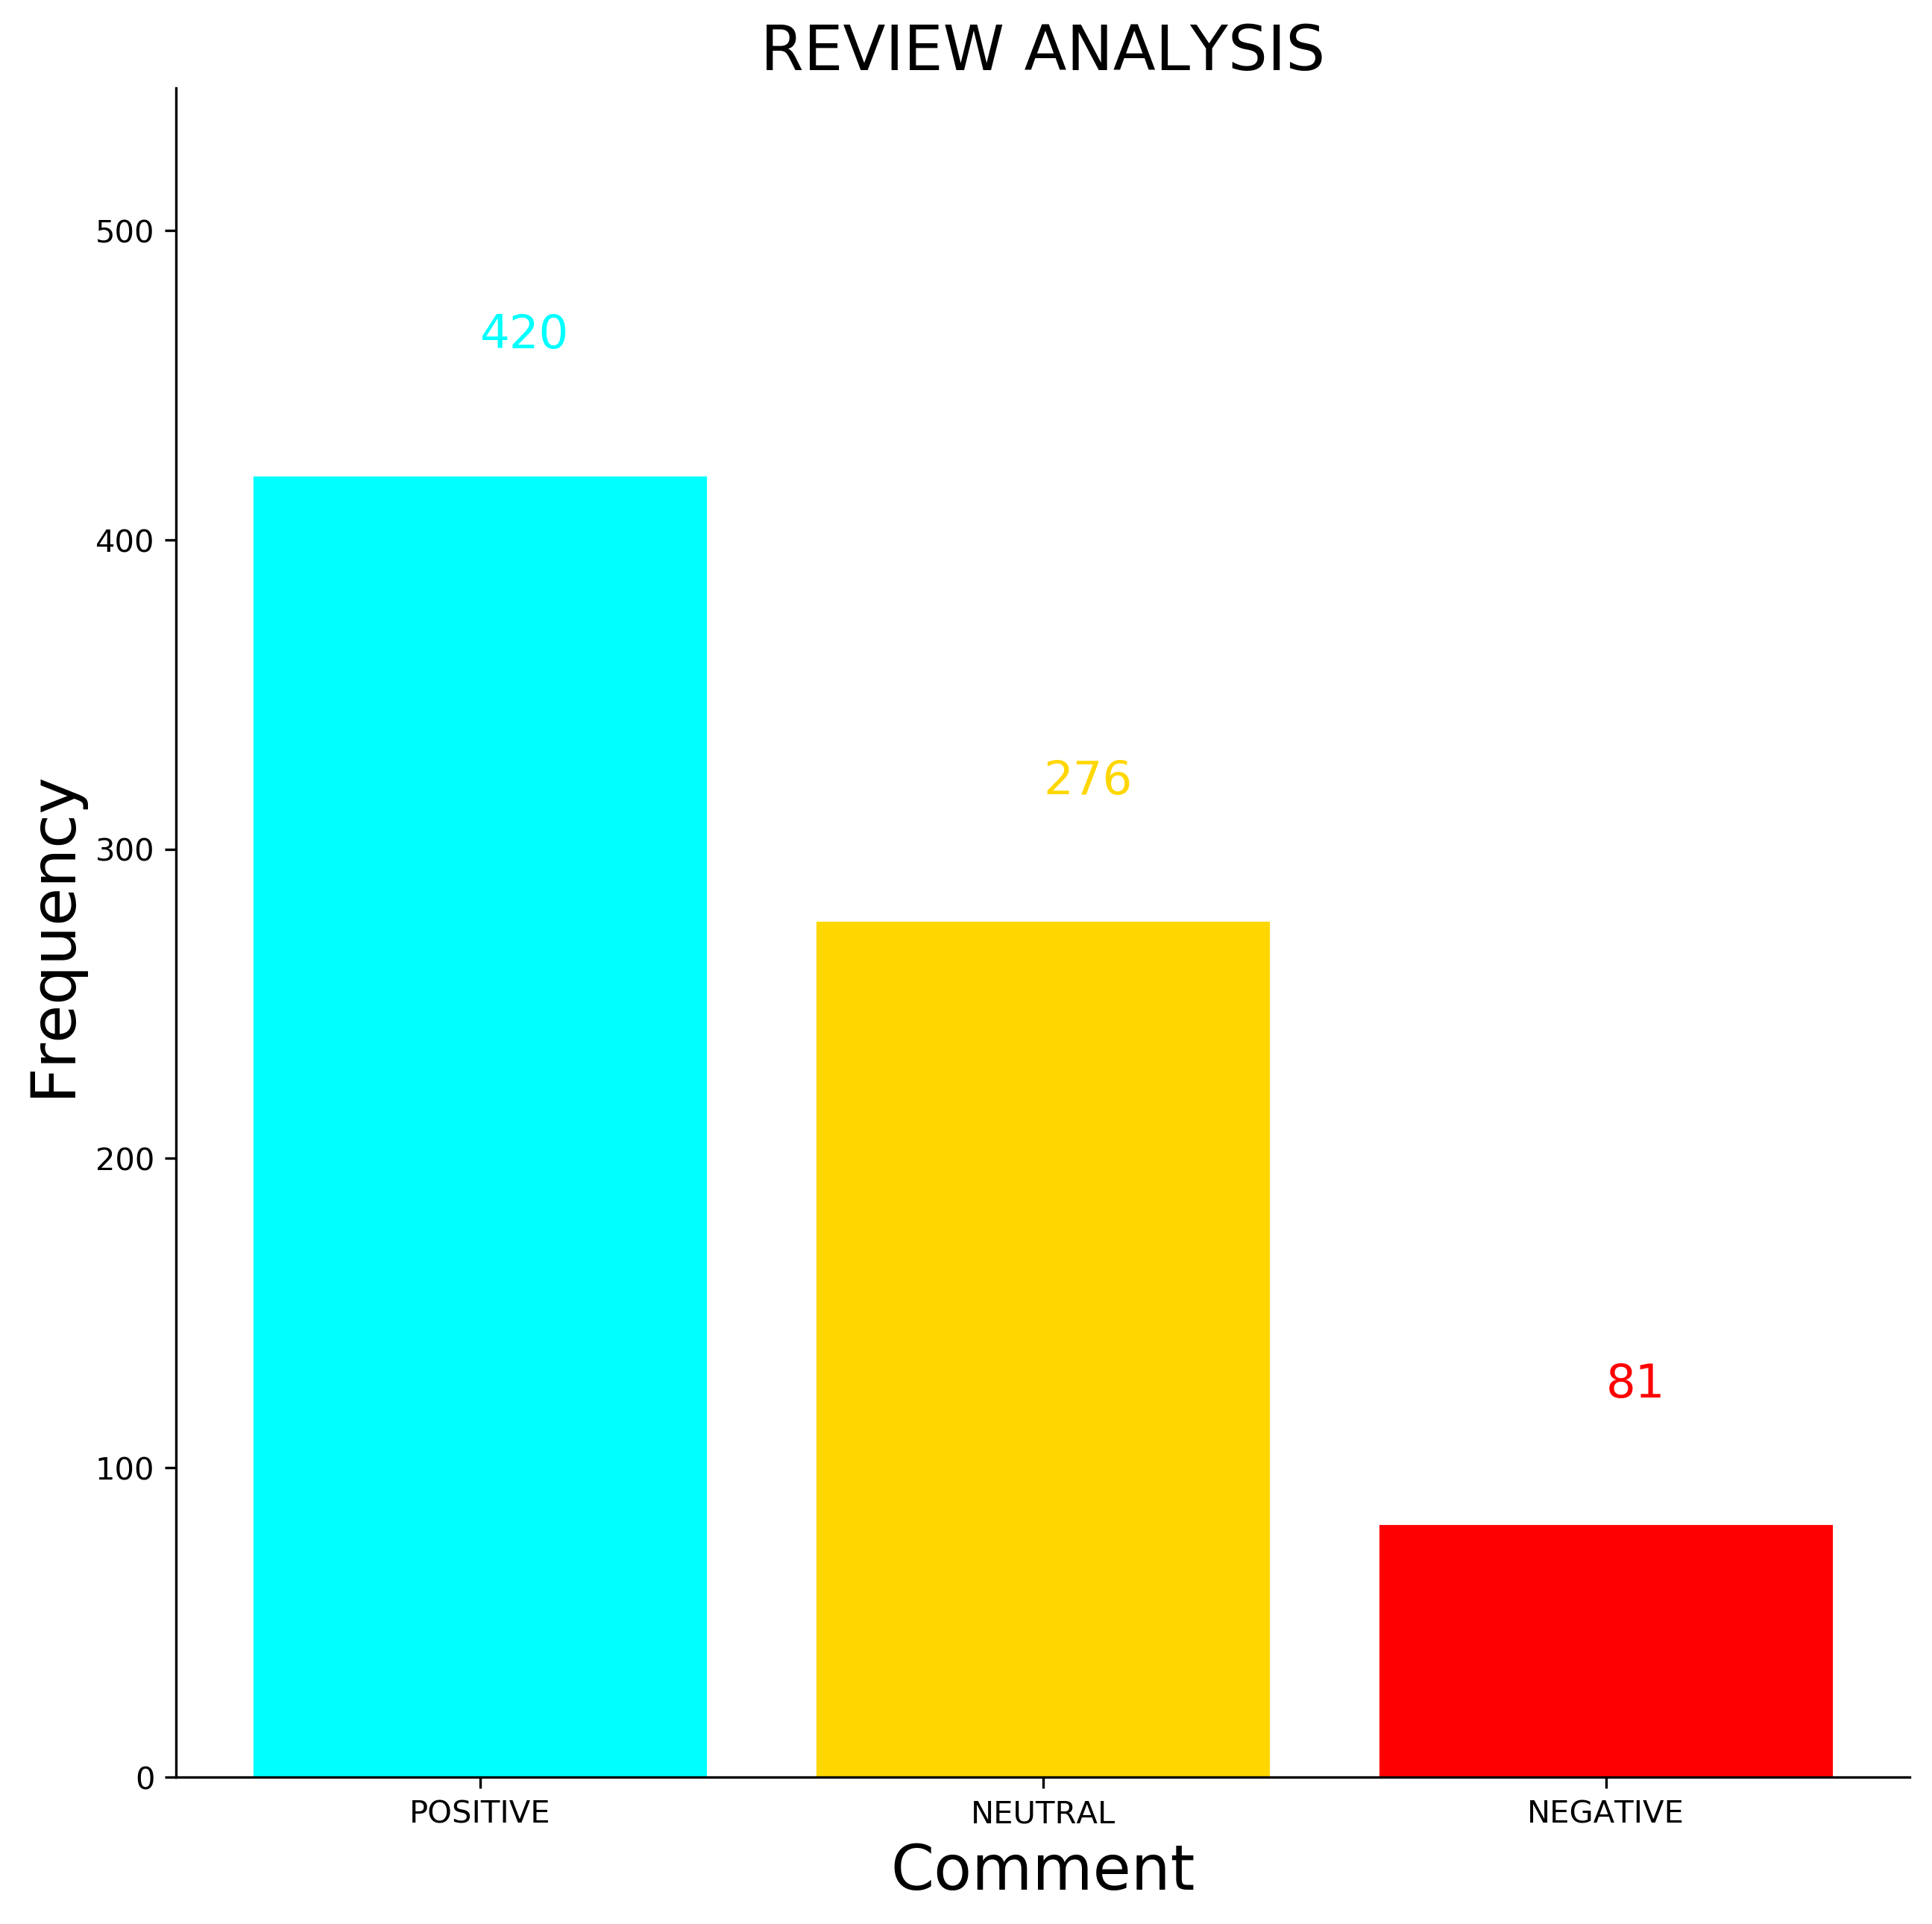

In [83]:
data = df['Comment'].value_counts() # category
label = list(data.index)
freq = data.values
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(label, freq)
ax.set_xlabel('Comment')
ax.set_ylabel('Frequency')
plt.title("REVIEW ANALYSIS")
show_text(['cyan', 'gold','red'], ax)
plt.show()

THE GRAPH BELOW SHOWS THE BAR PLOT FOR THE STARS ANALYSIS.IT SHOWS THAT MOST OF THE PEOPLE HAVE RATED THE PHONE 5 STAR.
WHICH PROMOTES THE USER TO BUY THE PHONE

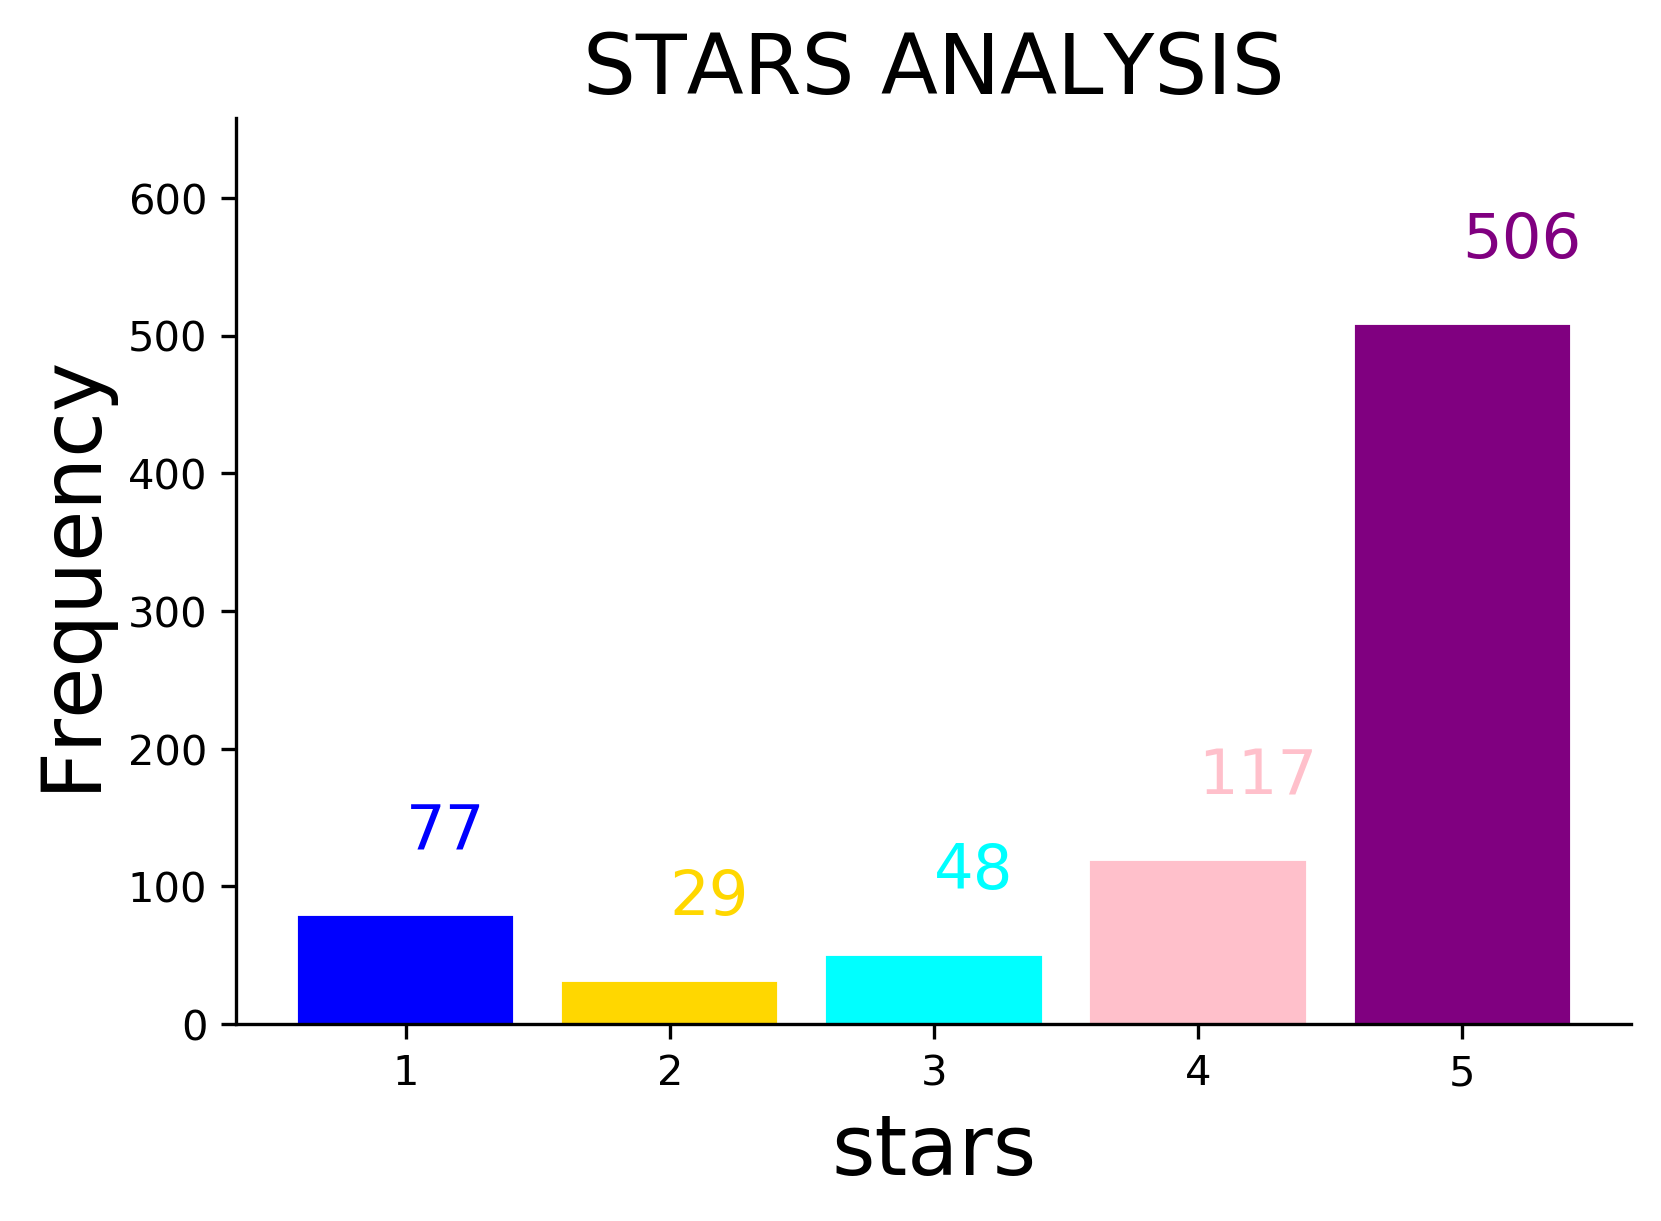

In [85]:
data = df['stars'].value_counts() # category
label = list(data.index)
freq = data.values
fig, ax = plt.subplots()
ax.bar(label, freq)
ax.set_xlabel('stars')
ax.set_ylabel('Frequency')
plt.title("STARS ANALYSIS")
show_text(['purple', 'pink','blue','cyan','gold'], ax)
plt.show()

THE GRAPH BELOW SHOWS US THAT THE MAXIMUM PEOPLE ARE SATISFIED WHICH PROMOTES THE OTHER CUSTOMERS TO BUY THE PHONE

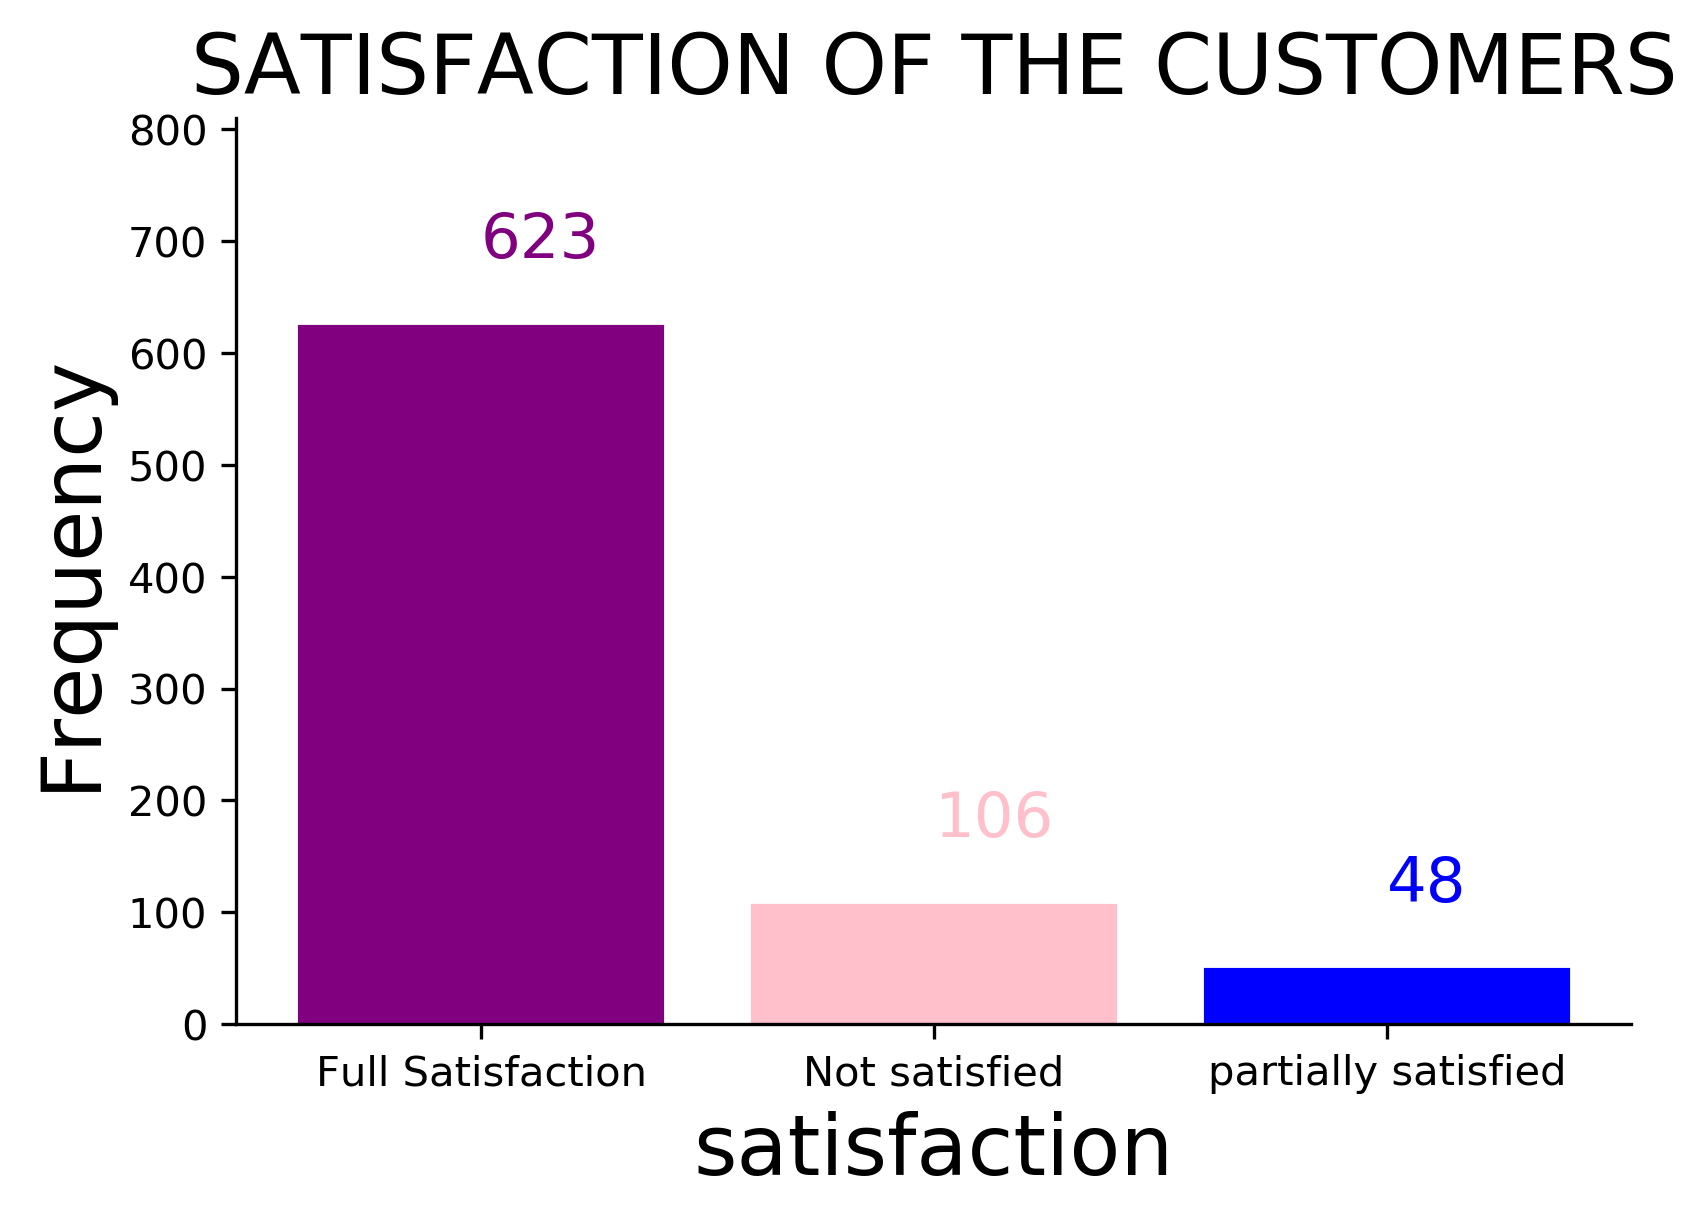

In [88]:
data = df['satisfaction'].value_counts() # category
label = list(data.index)
freq = data.values
fig, ax = plt.subplots()
ax.bar(label, freq)
ax.set_xlabel('satisfaction')
ax.set_ylabel('Frequency')
plt.title("SATISFACTION OF THE CUSTOMERS")
show_text(['purple', 'pink','blue'], ax)
plt.show()

In [89]:
def give_text(ax, fs=15,):
    m_h = 0
    heights = [ b.get_height() for b in ax.patches]
    max_height = max(heights)
    pad = max_height*0.3
    text_pad = max_height*0.1
    for box in  ax.patches:
        x = box.get_x()
        x += box.get_width()/3
        y = box.get_height()
        ax.text(x, y+text_pad, box.get_height(),
         fontsize=fs,color='red')
        
        ax.set_ylim([0, max_height+pad])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

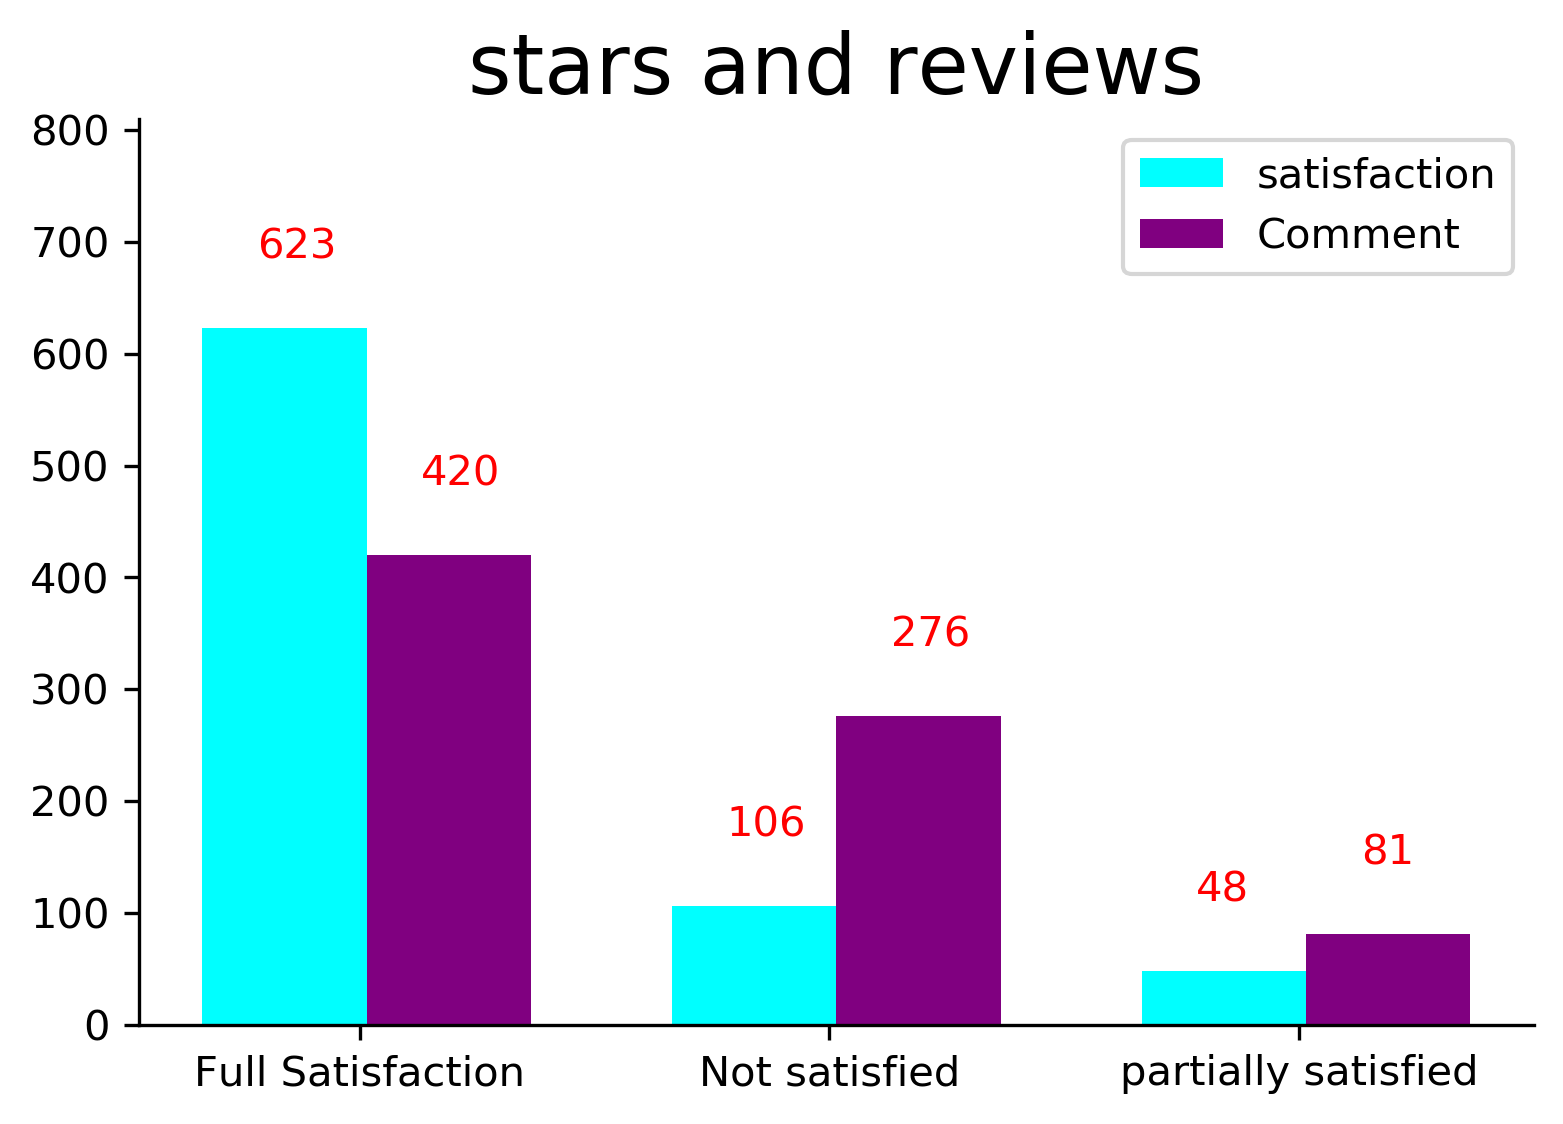

In [90]:
freq1=df['satisfaction'].value_counts()
freq2=df['Comment'].value_counts()
label1 = list(freq1.index)
fig, ax = plt.subplots()
ax.set_title("stars and reviews", fontsize=20)
ax.bar([0-0.16,1-0.16 ,2-0.16], freq1, width=0.35, color=['cyan'],label='satisfaction' )
ax.bar([0+0.19,1+0.19,2+0.19], freq2, width=0.35, color=['purple'],label='Comment')
ax.set_xticks([0, 1, 2])
#ax.set_xticklabel(['Full Satisfaction', 'Not satisfied', 'partially satisfied'])
plt.xticks(ticks=[0,1,2],labels=['Full Satisfaction', 'Not satisfied', 'partially satisfied'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
give_text(ax,fs=10)
plt.show()

##### NOW ANALYSING REVIEWS USING THE WORD CLOUD 

In [91]:
#CLEANING THE DATA
reviews=df['reviews']
s=['in','the','with','a','and','WITH','of','with','on','this','i','I','so','but','A','all','to','it','for','For','at','that','is',
  ]
y=[]

for m in s:
    u=m.upper()
    y.append(u)
    
k=[]
for i in reviews:
    a=list(set(i.split()))
    for j in s:
        if j in a:
            a.remove(j)
    for z in y:
        if z in a:
            a.remove(z)
    
    k.append(a)

In [92]:
review=list(df['reviews'])

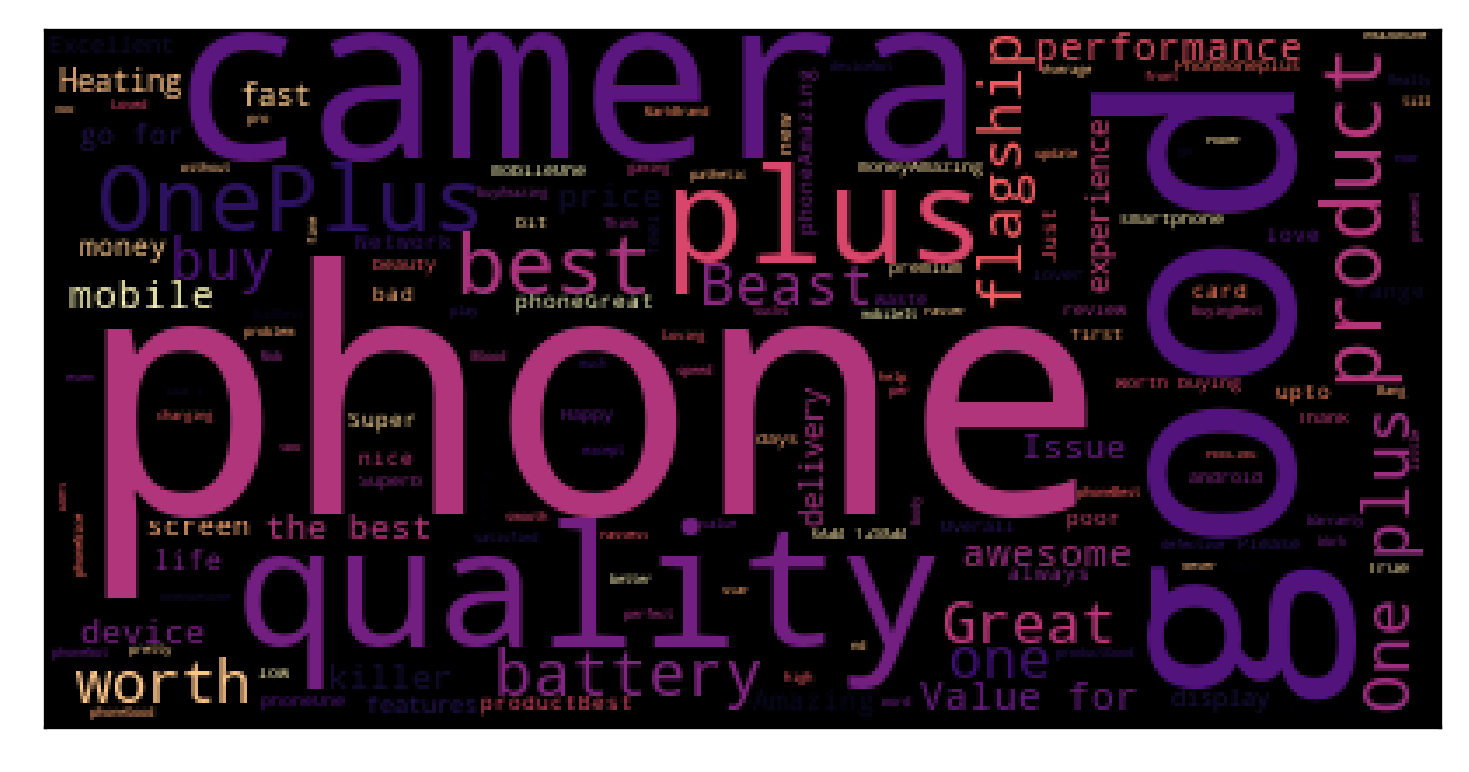

In [95]:
wc = WordCloud( background_color='black', stopwords=STOPWORDS,colormap='magma').generate(''.join(review) )
plt.figure(dpi=300)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

## WORD CLOUD FOR POSITIVE STATEMENTS

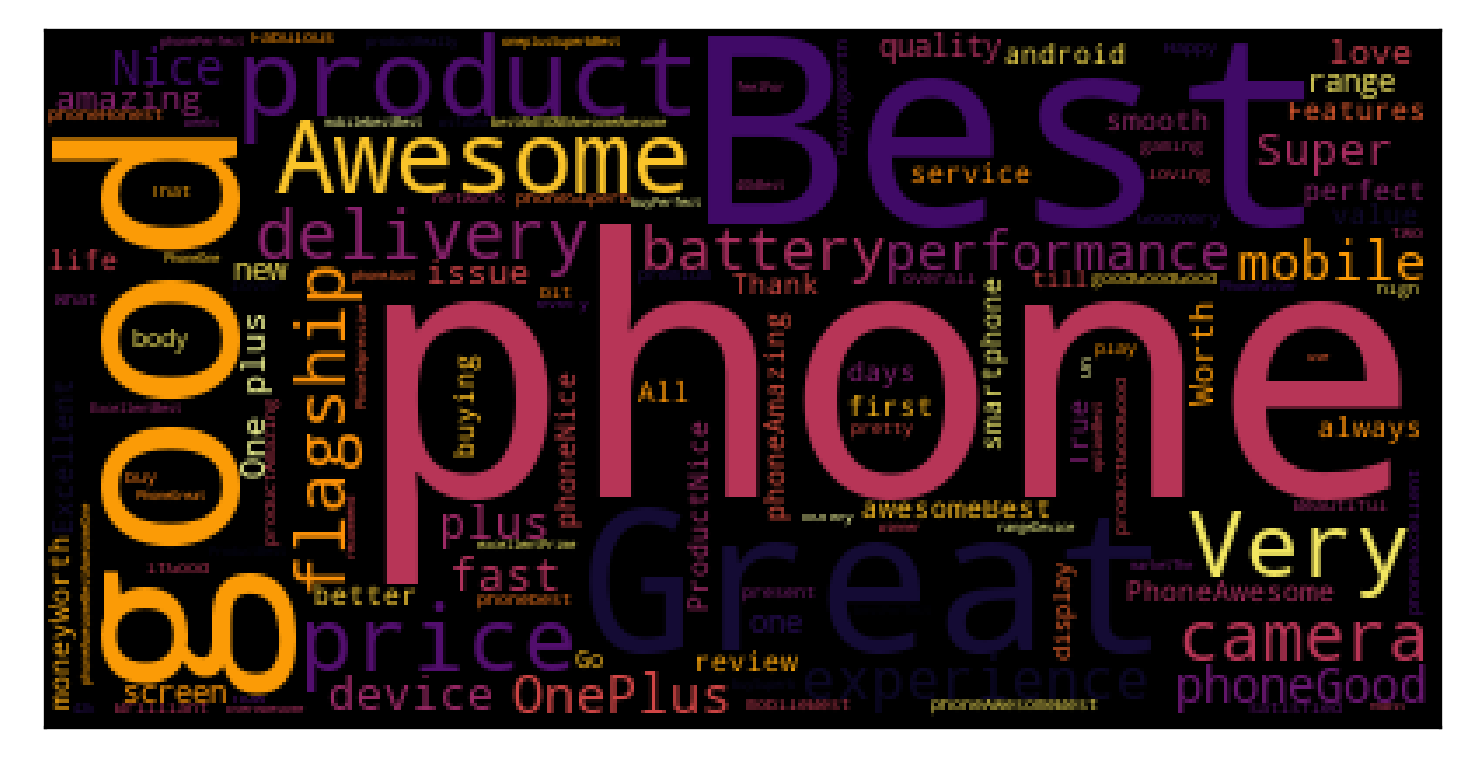

In [98]:
wc = WordCloud( background_color='black', stopwords=STOPWORDS,colormap='inferno').generate(''.join(positive_statements) )
plt.figure(dpi=300)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

## WORD CLOUD FOR NEGATIVE STATEMENTS

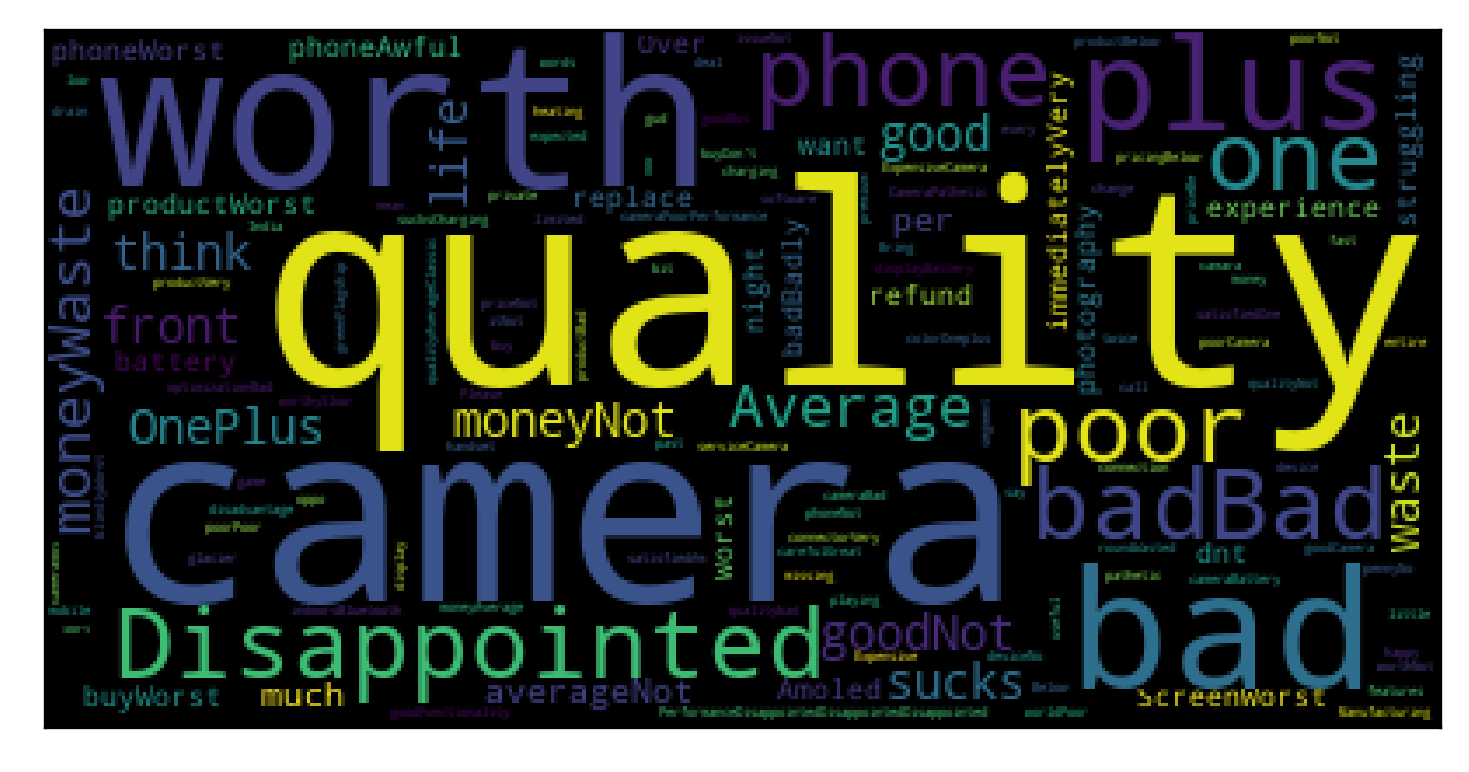

In [99]:
wc = WordCloud( background_color='black', stopwords=STOPWORDS,colormap='viridis').generate(''.join(negative_statements) )
plt.figure(dpi=300)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

## WORD CLOUD FOR NEUTRAL STATEMENTS

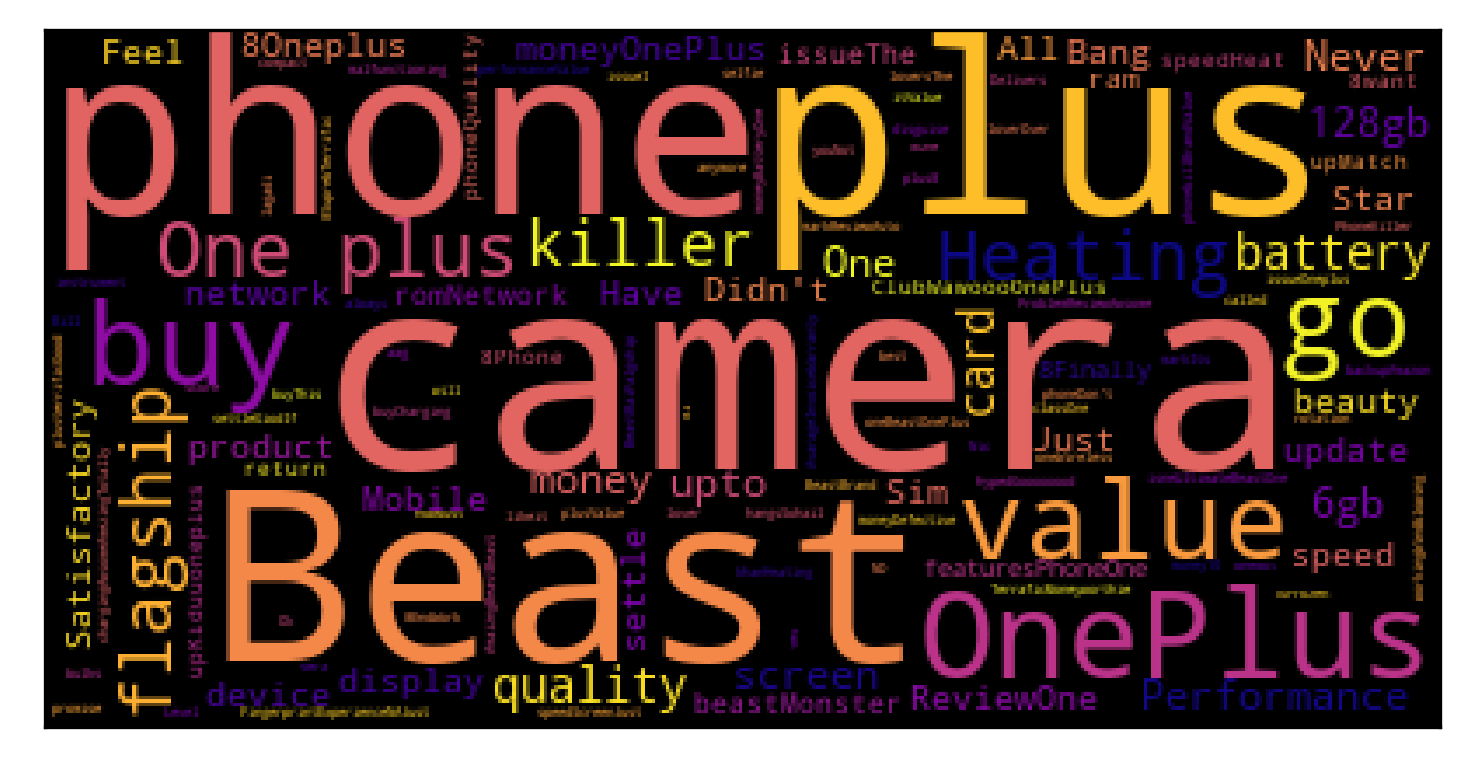

In [100]:
wc = WordCloud( background_color='black', stopwords=STOPWORDS,colormap='plasma').generate(''.join(neutral_statements) )
plt.figure(dpi=300)
plt.imshow(wc)
plt.xticks([])
plt.yticks([])
for sp in ax.spines:
    ax.spines[sp].set_visible(False)
plt.show()

In [108]:
df.to_csv("amazon_oneplus8.csv")

In [109]:
data=pd.read_csv("amazon_oneplus8.csv")

In [110]:
data.head()

,Unnamed: 0,name,reviews,stars,polarity,subjectivity,Comment,satisfaction
0,1,Manpreet Singh,Great but always with some screen and body iss...,3.0,1.00,0.75,POSITIVE,partially satisfied
1,2,ashish,Please read before buying,1.0,0.00,0.00,NEUTRAL,Not satisfied
2,3,Vivek Kr. Meena,Delivers what they promised.! ;),5.0,0.25,1.00,POSITIVE,Full Satisfaction
3,4,Rahul,Amazing Experience with Oneplus 8,5.0,0.60,0.90,POSITIVE,Full Satisfaction
4,5,shaikh,Poor Camera Quality.....Too Expensive,1.0,-0.45,0.65,NEGATIVE,Not satisfied


## from the above report we got into the conclusion that most of the customers have given positive reviews.
## so it is recomended to buy the phone